#### Name: Chaithra Kopparam Cheluvaiah
#### Assignment: HW02 Data Preparation
#### Date: Feb 06, 2022

Each of 5 schools (A, B, C, D and E) is implementing the same math course this semester, with 35 lessons. There are 30 sections total. The semester is about 3/4 of the way through.

For each section, we record the number of students who are:

- completed (finished with the course)
- very ahead (more than 5 lessons ahead)
- middling  (5 lessons ahead to 0 lessons ahead)
- behind (1 to 5 lessons behind)
- more behind (6 to 10 lessons behind)
- very behind  (more than 10 lessons behind)

**What’s the story (or stories) in this data? Find it, and tell it visually and, above all, truthfully.**


In [1]:
# loading required libraries
import pandas as pd
import seaborn as sns

In [2]:
# loading data into a dataframe
path = 'data-storyteller.csv'
df = pd.read_csv(path, header=0, na_values='NA')

#### Analyzing Structure and Summary of Data

In [3]:
# viewing the data - first 5 rows
df.head()

,School,Section,Very Ahead +5,Middling +0,Behind -1-5,More Behind -6-10,Very Behind -11,Completed
0,A,1,0,5,54,3,9,10
1,A,2,0,8,40,10,16,6
2,A,3,0,9,35,12,13,11
3,A,4,0,14,44,5,12,10
4,A,5,0,9,42,2,24,8


In [4]:
#Shape of data
df.shape
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  30
Number of columns:  8


This is a small data set with 30 rows and 8 columns

In [5]:
# checking for data type and null values in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   School             30 non-null     object
 1   Section            30 non-null     int64 
 2    Very Ahead +5     30 non-null     int64 
 3    Middling +0       30 non-null     int64 
 4    Behind -1-5       30 non-null     int64 
 5   More Behind -6-10  30 non-null     int64 
 6    Very Behind -11   30 non-null     int64 
 7    Completed         30 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.0+ KB


# Data Cleaning & Wrangling

In [6]:
# renaming columns - removing spaces and digits for easy access
df = df.rename(columns={' Very Ahead +5':'VeryAhead', ' Middling +0':'Middling',' Behind -1-5':'Behind', 
                                'More Behind -6-10':'MoreBehind',' Very Behind -11':'VeryBehind', ' Completed':'Completed'})

In [7]:
df.columns

Index(['School', 'Section', 'VeryAhead', 'Middling', 'Behind', 'MoreBehind',
       'VeryBehind', 'Completed'],
      dtype='object')

In [8]:
# re-arranging the columns in descinding order of students progress. 
# students who already completed the course will be at the beginning and who are very behind will be at the end of the dataframe
df = df[["School","Section","Completed","VeryAhead","Middling","Behind","MoreBehind","VeryBehind"]]

In [9]:
# checking for null values
df.isnull().sum()

School        0
Section       0
Completed     0
VeryAhead     0
Middling      0
Behind        0
MoreBehind    0
VeryBehind    0
dtype: int64

There are no null values

In [10]:
#Checking for NA values
df.isna().sum()

School        0
Section       0
Completed     0
VeryAhead     0
Middling      0
Behind        0
MoreBehind    0
VeryBehind    0
dtype: int64

There are no 'NA' values

In [11]:
# datatypes of each field
df.dtypes

School        object
Section        int64
Completed      int64
VeryAhead      int64
Middling       int64
Behind         int64
MoreBehind     int64
VeryBehind     int64
dtype: object

# Data Analysis & Visualization

During our analysis we will be answering some of the business questions through visualization such as
1. How many students are there in each school
2. What is the distribution of student progress categories
3. How are student progress distributed across each school
4. Which schools have higher percentage of students ahead or behind
5. Are their any outliers in our analysis?
6. What is the breakup of students & schools according to sections

In [12]:
# summary of the statistical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Section,30.0,5.900000,3.898275,1.0,2.25,5.5,9.00,13.0
Completed,30.0,10.533333,6.004213,1.0,6.00,10.0,14.00,27.0
VeryAhead,30.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
Middling,30.0,7.400000,3.909317,2.0,4.25,7.5,9.75,19.0
Behind,30.0,25.133333,13.935154,4.0,15.25,22.0,34.25,56.0
MoreBehind,30.0,3.333333,3.283536,0.0,1.00,2.0,4.75,12.0
VeryBehind,30.0,6.966667,6.272454,0.0,1.25,5.5,11.50,24.0


There is no data in VeryAhead. It is okay to drop this column

In [13]:
# df.drop('VeryAhead', axis=1, inplace=True)

#### Creating Frequency Table

In [14]:
# How many section in each School?
df.groupby('School').count()['Section']

School
A    13
B    12
C     3
D     1
E     1
Name: Section, dtype: int64

School "A" has highest number of sections - 13 

School "B" has Second highest number of sections - 12

#### Bar Chart - Number of Students in each School

In [15]:
# How many Students in Each School?
grouped = df.groupby('School').sum()
school_strength = grouped[['Completed','Middling','Behind','MoreBehind','VeryBehind']].sum(axis=1)
school_strength

School
A    932
B    446
C     85
D     22
E    116
dtype: int64

<AxesSubplot:title={'center':'Total Students per School'}, xlabel='School', ylabel='Total Students'>

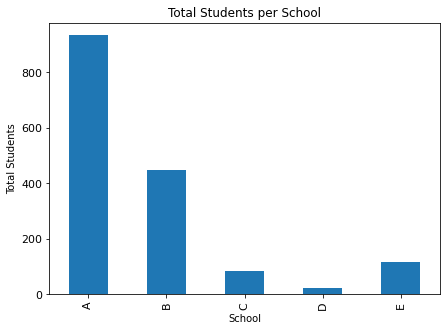

In [28]:
school_strength.plot(kind='bar',ylabel='Total Students',fontsize=11,title='Total Students per School',  figsize=(7,5))

#### Bar Chart - Status of Students Across each schools

In [17]:
# grade distribution across all the schools
school_performance = df.groupby('School').sum().drop('Section', axis=1)
school_performance

,Completed,VeryAhead,Middling,Behind,MoreBehind,VeryBehind
School,,,,,,
A,142,0,113,450,73,154
B,125,0,84,201,14,22
C,19,0,11,39,4,12
D,3,0,3,8,2,6
E,27,0,11,56,7,15


<AxesSubplot:xlabel='School'>

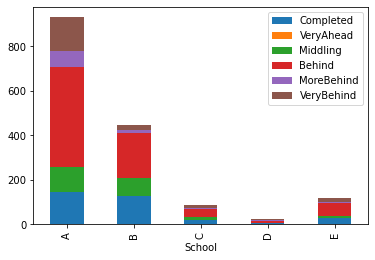

In [18]:
school_performance.plot(kind='bar', stacked=True)

According to above chart, we see that Schools "A" and "B" have a very high number of students middling or behind.In the coming weeks if resources are concentrated around these schools we can expect good results.

#### Box Plot - Performance across each school

array([[<AxesSubplot:title={'center':'Behind'}, xlabel='[School]'>,
        <AxesSubplot:title={'center':'Completed'}, xlabel='[School]'>],
       [<AxesSubplot:title={'center':'Middling'}, xlabel='[School]'>,
        <AxesSubplot:title={'center':'MoreBehind'}, xlabel='[School]'>],
       [<AxesSubplot:title={'center':'VeryAhead'}, xlabel='[School]'>,
        <AxesSubplot:title={'center':'VeryBehind'}, xlabel='[School]'>]],
      dtype=object)

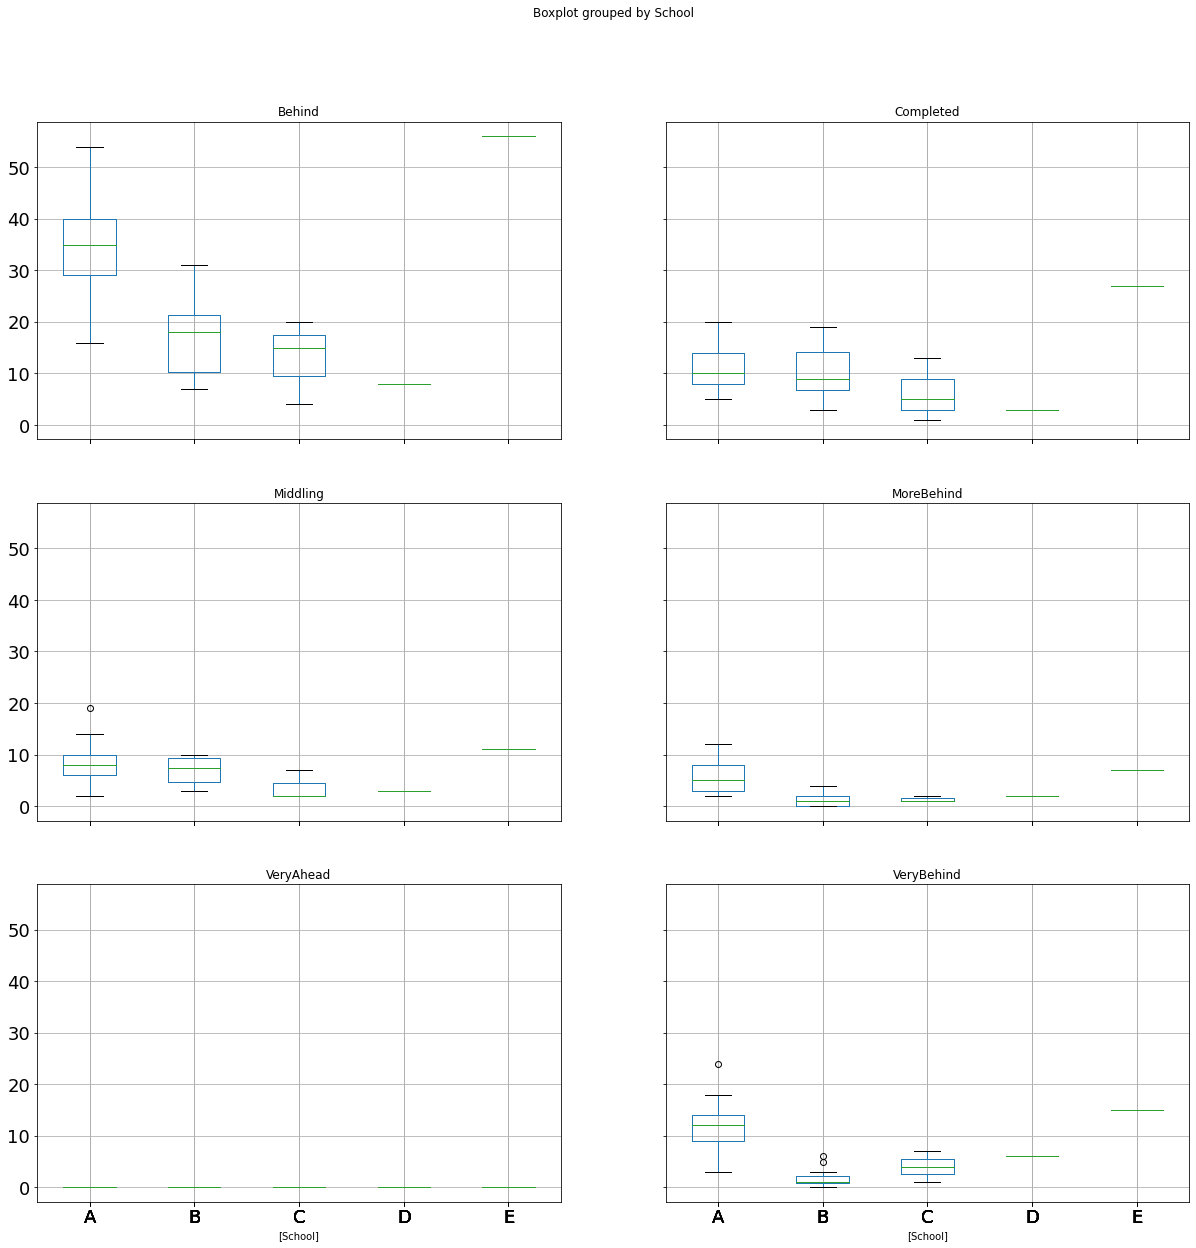

In [19]:
df.drop('Section',axis=1).boxplot(by='School',fontsize=18,  figsize=(20,20))

From the boxplot we observe that there are some sections in School "A" and "B" that are outliers. Pinpointing these sections will help us allocate resources in a much better way.

#### ScatterPlots - Details by School and Section

Plot that maps Section Total vs Middling Counts

In [20]:
# section total
df['Total'] = df[['Completed','Middling','Behind','MoreBehind','VeryBehind']].sum(axis=1)

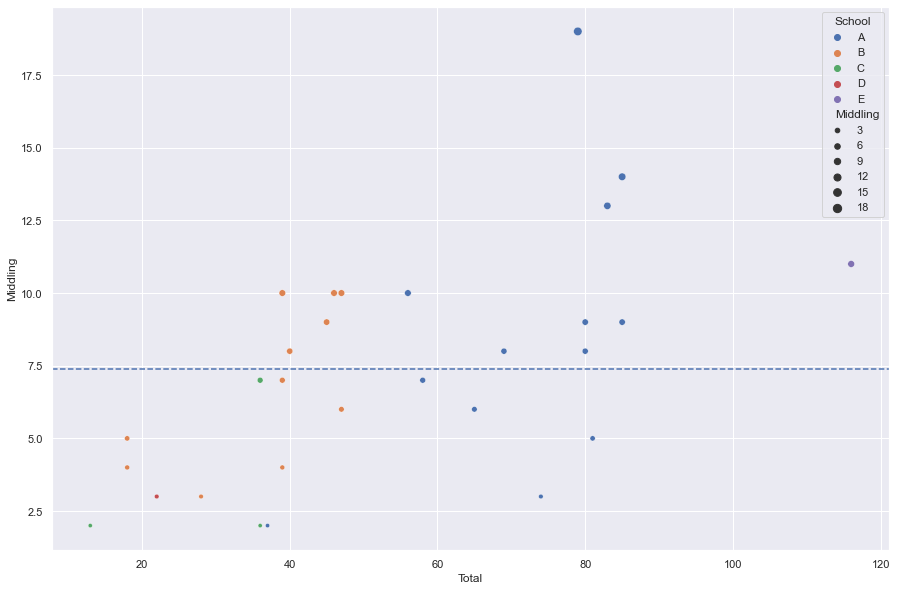

In [41]:
sns.set(rc={"figure.figsize":(15, 10)}) #width=6, height=5

ax = sns.scatterplot(data=df, x='Total', y='Middling', size='Middling',hue='School')
ax.axhline(df['Middling'].mean(), ls='--')

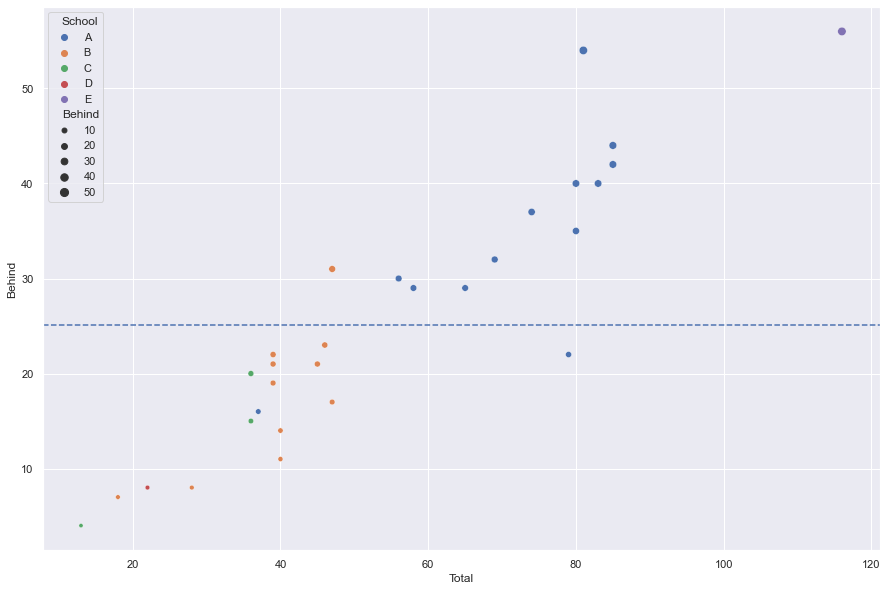

In [43]:
ax = sns.scatterplot(data=df, x='Total', y='Behind', size='Behind',hue='School')
ax.axhline(df['Behind'].mean(), ls='--')

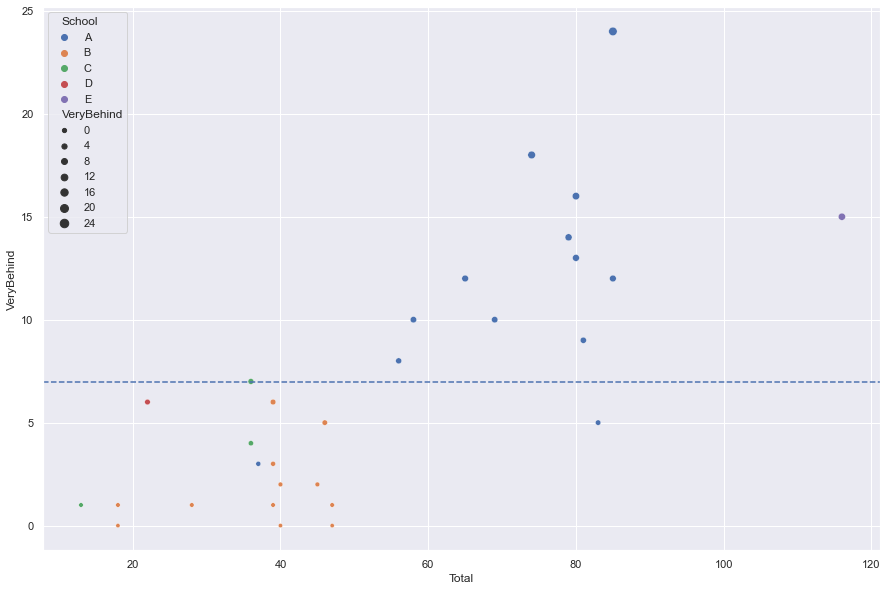

In [44]:
ax = sns.scatterplot(data=df, x='Total', y='VeryBehind', size='VeryBehind',hue='School')
ax.axhline(df['VeryBehind'].mean(), ls='--')

# Conclusion
1. Data discovery showed us 0 students in “Very Ahead” bucket. Assumption is that these students have completed their course
2. School "A" has highest number of students studying the maths course - 932 students